<h2>Walmart Store Data Analysis and model Prediction

<h4> Objective

1. Prediction of sales imapacted by holidays

2. prediction of demand of supplies on these holiday weeks



# <h4> Analysis tasks

1.Which store has maximum sales?

2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3.Which store/s has good quarterly growth rate in Q3’2012

4.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5.Provide a monthly and semester view of sales in units and give insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
### by this info i can conclude that there are no missing values

In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
##no null values

In [11]:
store_holi=df.groupby('Store').sum()['Weekly_Sales'].reset_index()

In [12]:
store_holi

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


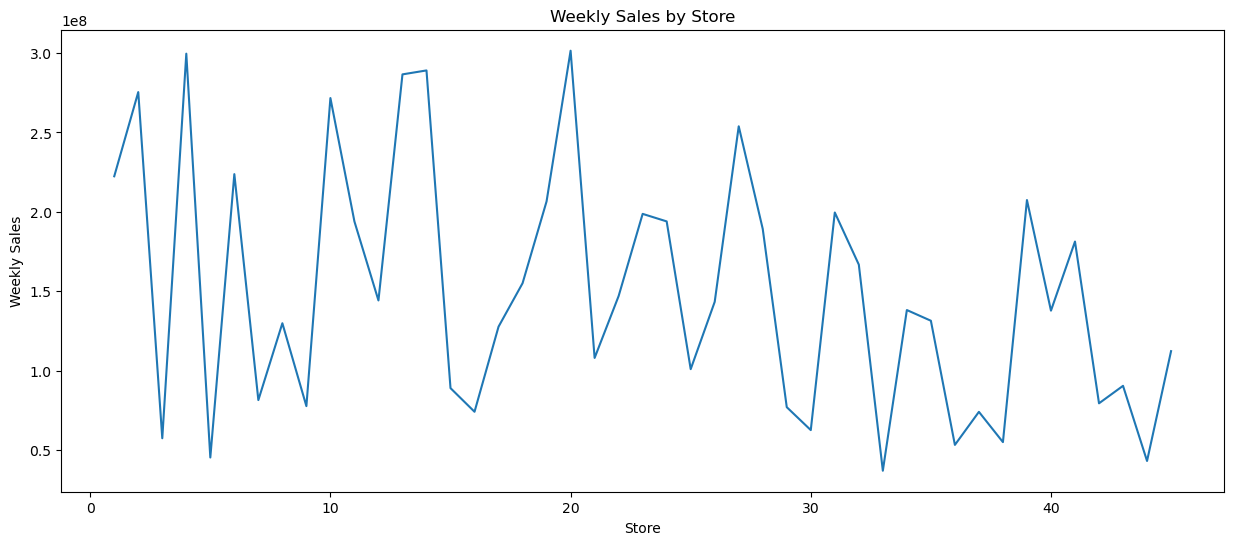

In [13]:
plt.figure(figsize=[15,6])
plt.plot(store_holi['Store'], store_holi['Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Store')
plt.show()


In [14]:
max_sales_store = store_holi.loc[store_holi['Weekly_Sales'].idxmax(), 'Store']


In [15]:
max_sales_store

20

In [16]:


# Calculate standard deviation of sales for each store
std_sales = df.groupby('Store')['Weekly_Sales'].std()

# Find store with maximum standard deviation
max_std_store = std_sales.idxmax()

# Calculate coefficient of mean to standard deviation
mean_sales = df.groupby('Store')['Weekly_Sales'].mean()
coefficient_of_variation = std_sales / mean_sales



In [17]:
std_sales


Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [18]:
max_std_store##store no 14 has maximum sales

14

In [19]:
mean_sales

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [20]:
coefficient_of_variation

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

<h4> Which store/s has good quarterly growth rate in Q3’2012<h4>
    

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [22]:
q3_2012_data = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')]

In [23]:
q3_2012_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].sum()

In [24]:
q3_2012_growth_rate =q3_2012_sales.pct_change()

In [25]:
improved_stores =q3_2012_growth_rate[q3_2012_growth_rate >0]

In [26]:
print("Stores with positive quarterly growth rate in Q3'2012:")
print(improved_stores)

Stores with positive quarterly growth rate in Q3'2012:
Store
2     0.199932
4     4.246652
6     3.843498
8     0.421912
10    2.280656
13    1.107576
17    0.749544
18    0.082693
19    0.349435
20    0.477268
22    0.422874
23    0.451248
26    0.501325
27    0.631194
31    2.182782
34    2.636394
37    0.755900
39    2.695510
41    0.405544
43    0.096456
45    1.172007
Name: Weekly_Sales, dtype: float64


In [27]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup (if needed)
# df = pd.read_csv('your_data_file.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for Q2 and Q3 2012
q2_2012_data = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')]
q3_2012_data = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')]

# Group by store and calculate total sales for Q2 and Q3 2012
q2_2012_sales = q2_2012_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
q3_2012_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Rename columns for clarity
q2_2012_sales.rename(columns={'Weekly_Sales': 'Q2_2012_Sales'}, inplace=True)
q3_2012_sales.rename(columns={'Weekly_Sales': 'Q3_2012_Sales'}, inplace=True)

# Merge the Q2 and Q3 sales data
sales_data = pd.merge(q2_2012_sales, q3_2012_sales, on='Store')

# Calculate the growth rate
sales_data['Growth_Rate'] = (sales_data['Q3_2012_Sales'] - sales_data['Q2_2012_Sales']) / sales_data['Q2_2012_Sales']

# Filter stores with positive growth rates
improved_stores = sales_data[sales_data['Growth_Rate'] > 0]

# Print stores with positive growth rates
print("Stores with positive quarterly growth rate in Q3'2012:")
print(improved_stores)

# Plot the growth rates
plt.figure(figsize=(10, 8))
sns.histplot(improved_stores['Growth_Rate'], bins=20)
plt.title('Stores with positive quarterly growth rate in Q3 2012')
plt.xlabel('Growth Rate')
plt.ylabel('Number of Stores')
plt.show()"""


'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Sample data setup (if needed)\n# df = pd.read_csv(\'your_data_file.csv\')\n\n# Convert \'Date\' column to datetime format\ndf[\'Date\'] = pd.to_datetime(df[\'Date\'], format=\'%d-%m-%Y\')\n\n# Filter data for Q2 and Q3 2012\nq2_2012_data = df[(df[\'Date\'] >= \'2012-04-01\') & (df[\'Date\'] <= \'2012-06-30\')]\nq3_2012_data = df[(df[\'Date\'] >= \'2012-07-01\') & (df[\'Date\'] <= \'2012-09-30\')]\n\n# Group by store and calculate total sales for Q2 and Q3 2012\nq2_2012_sales = q2_2012_data.groupby(\'Store\')[\'Weekly_Sales\'].sum().reset_index()\nq3_2012_sales = q3_2012_data.groupby(\'Store\')[\'Weekly_Sales\'].sum().reset_index()\n\n# Rename columns for clarity\nq2_2012_sales.rename(columns={\'Weekly_Sales\': \'Q2_2012_Sales\'}, inplace=True)\nq3_2012_sales.rename(columns={\'Weekly_Sales\': \'Q3_2012_Sales\'}, inplace=True)\n\n# Merge the Q2 and Q3 sales data\nsales_data = pd.merge(q2_2012_sales, q3_2012

In [28]:
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import QuarterEnd

# Read the data
df = pd.read_csv("Walmart_Store_sales.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for Q2 and Q3 2012
q2_2012_data = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')]
q3_2012_data = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')]

# Sum the sales for each store in Q2 and Q3
q2_2012_sales = q2_2012_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
q3_2012_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Merge the Q2 and Q3 sales data on 'Store'
sales_comparison = pd.merge(q2_2012_sales, q3_2012_sales, on='Store', suffixes=('_Q2', '_Q3'))

# Calculate the quarterly growth rate
sales_comparison['Growth_Rate'] = (sales_comparison['Weekly_Sales_Q3'] - sales_comparison['Weekly_Sales_Q2']) / sales_comparison['Weekly_Sales_Q2']

# Identify stores with positive growth
improved_stores = sales_comparison[sales_comparison['Growth_Rate'] > 0]

print("Stores with positive quarterly growth rate in Q3'2012:")
print(improved_stores[['Store', 'Growth_Rate']])"""


'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom pandas.tseries.offsets import QuarterEnd\n\n# Read the data\ndf = pd.read_csv("Walmart_Store_sales.csv")\n\n# Convert \'Date\' column to datetime format\ndf[\'Date\'] = pd.to_datetime(df[\'Date\'], format=\'%d-%m-%Y\')\n\n# Filter data for Q2 and Q3 2012\nq2_2012_data = df[(df[\'Date\'] >= \'2012-04-01\') & (df[\'Date\'] <= \'2012-06-30\')]\nq3_2012_data = df[(df[\'Date\'] >= \'2012-07-01\') & (df[\'Date\'] <= \'2012-09-30\')]\n\n# Sum the sales for each store in Q2 and Q3\nq2_2012_sales = q2_2012_data.groupby(\'Store\')[\'Weekly_Sales\'].sum().reset_index()\nq3_2012_sales = q3_2012_data.groupby(\'Store\')[\'Weekly_Sales\'].sum().reset_index()\n\n# Merge the Q2 and Q3 sales data on \'Store\'\nsales_comparison = pd.merge(q2_2012_sales, q3_2012_sales, on=\'Store\', suffixes=(\'_Q2\', \'_Q3\'))\n\n# Calculate the quarterly growth rate\nsales_comparison[\'Growth_Rate\'] = (sales_compariso

<h4>
    Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [29]:
non_holiday_sales_mean =df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()

In [30]:
holiday_data =df[df['Holiday_Flag']==1]

In [31]:
holiday_sales = holiday_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [32]:
higher_sales_holidays =holiday_sales[holiday_sales['Weekly_Sales']>non_holiday_sales_mean]

In [33]:
print("Holidays with higher sales than the mean non-holiday sales:")
print(higher_sales_holidays)

Holidays with higher sales than the mean non-holiday sales:
        Date  Weekly_Sales
0 2010-02-12   48336677.63
1 2010-09-10   45634397.84
2 2010-11-26   65821003.24
3 2010-12-31   40432519.00
4 2011-02-11   47336192.79
5 2011-09-09   46763227.53
6 2011-11-25   66593605.26
7 2011-12-30   46042461.04
8 2012-02-10   50009407.92
9 2012-09-07   48330059.31


<h4>Provide a monthly and semester view of sales in units and give insights

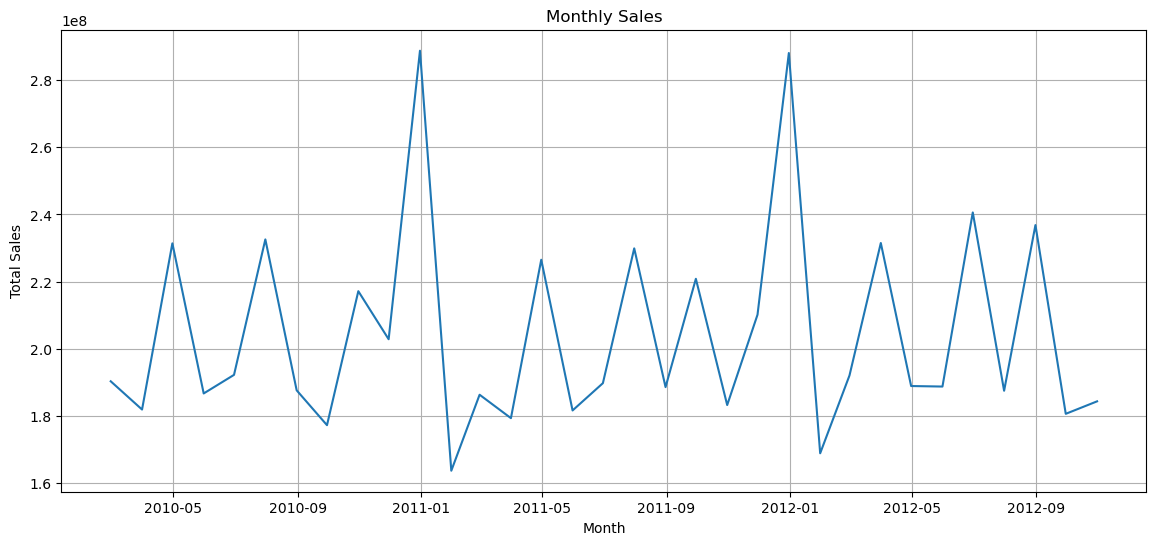

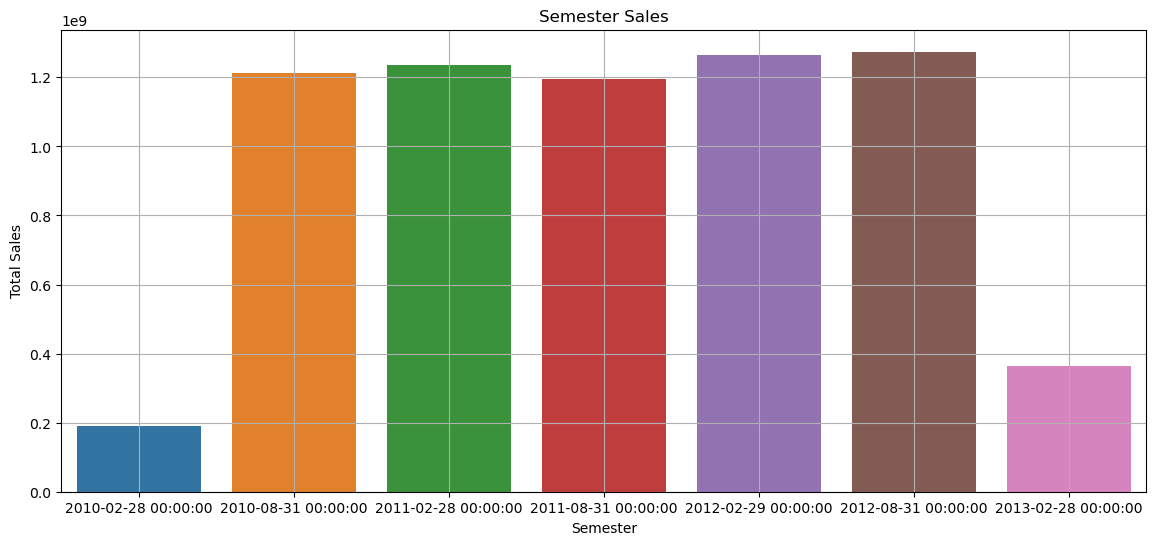

Insights:
The total monthly sales range from 163703966.83 to 288760532.72.
The total semester sales range from 190332983.04 to 1274167583.26.


In [34]:

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample data by month and calculate total monthly sales
monthly_sales = df['Weekly_Sales'].resample('M').sum()

# Resample data by semester (6 months) and calculate total sales
semester_sales = df['Weekly_Sales'].resample('6M').sum()

# Reset the index to have 'Date' as a column
monthly_sales = monthly_sales.reset_index()
semester_sales = semester_sales.reset_index()

# Plot monthly sales
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Plot semester sales
plt.figure(figsize=(14, 6))
sns.barplot(data=semester_sales, x='Date', y='Weekly_Sales')
plt.title('Semester Sales')
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Provide insights
print("Insights:")
print(f"The total monthly sales range from {monthly_sales['Weekly_Sales'].min():.2f} to {monthly_sales['Weekly_Sales'].max():.2f}.")
print(f"The total semester sales range from {semester_sales['Weekly_Sales'].min():.2f} to {semester_sales['Weekly_Sales'].max():.2f}.")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
import pandas as pd
from datetime import datetime

# Load the data
df = pd.read_csv("Walmart_Store_sales.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for Store 1
store_1_data = df[df['Store'] == 1].copy()

# Check if store_1_data is empty (debugging step)
if store_1_data.empty:
    print("No data found for Store 1")
else:
    # Calculate the earliest date
    earliest_date = store_1_data['Date'].min()

    # Create a new column 'Day' representing the number of days since the earliest date
    store_1_data['Day'] = (store_1_data['Date'] - earliest_date).dt.days

    # Display the first few rows to verify the 'Day' column
    print(store_1_data.head())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  
0  211.096358         8.106    0  
1  211.242170         8.106    7  
2  211.289143         8.106   14  
3  211.319643         8.106   21  
4  211.350143         8.106   28  


In [37]:
store_1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,28
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,966
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,973
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,980
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,987


In [38]:
store_1_data.corr(numeric_only=True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955,0.214539
Holiday_Flag,NaN,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949,-0.013285
Temperature,NaN,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.154069
Fuel_Price,NaN,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944,0.781789
CPI,NaN,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.973943
Unemployment,NaN,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000,-0.791222
Day,NaN,0.214539,-0.013285,0.154069,0.781789,0.973943,-0.791222,1.000000


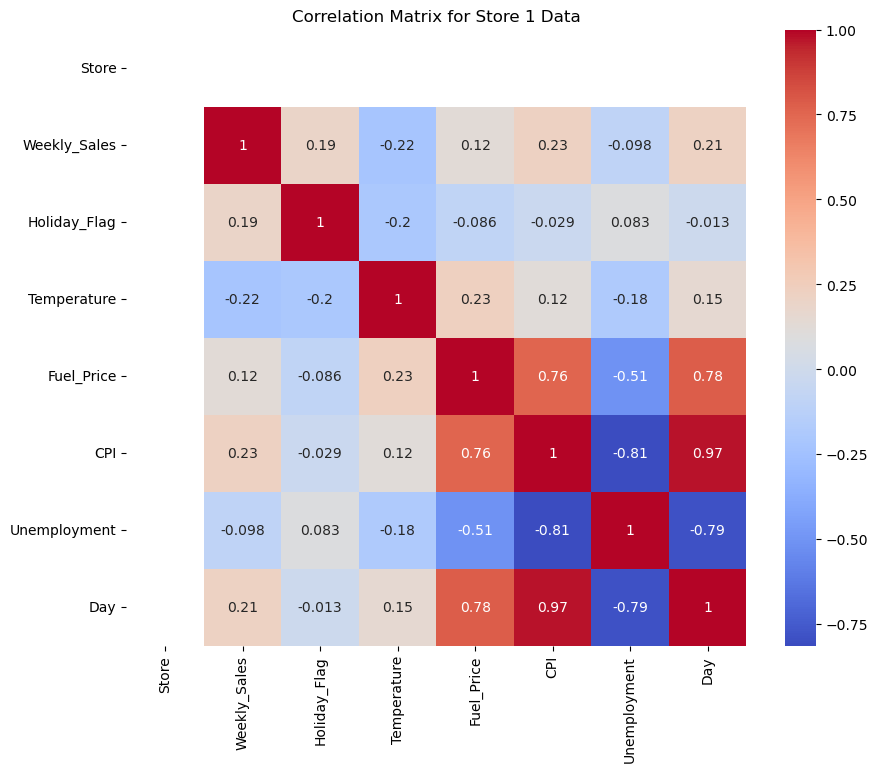

In [39]:
numeric_columns = store_1_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = store_1_data[numeric_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Store 1 Data')
plt.show()

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Select features and target variable
features = ['Day', 'CPI',  'Fuel_Price']
target = 'Weekly_Sales'

X = store_1_data[features]
y = store_1_data[target]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [44]:
# Make predictions

y_pred_test = model.predict(X_test)

# Calculate and print the Mean Squared Error for training and testing sets
#mse_train = mean_squared_error(y_train, y_pred_train)
#mse_test = mean_squared_error(y_test, y_pred_test)

#print(f"Mean Squared Error on Training Set: {mse_train}")
#print(f"Mean Squared Error on Testing Set: {mse_test}")

# Print model coefficients
#print("Model Coefficients:")
#print(pd.Series(model.coef_, index=features))


In [45]:
from sklearn import metrics
print('R2 score:',metrics.r2_score(y_test,y_pred_test))
print('mean square error:',metrics.mean_squared_error(y_test,y_pred_test))

R2 score: -0.06028896245523918
mean square error: 25645415617.662777


In [46]:
import sklearn
from sklearn.linear_model import Ridge

ridgemod = Ridge(alpha=0.001)
ridgemod.fit(X_train, y_train)



Ridge(alpha=0.001)

In [47]:
ridgemod.score(X_test,y_test)

-0.06028212327688309

In [48]:
from sklearn.linear_model import Lasso
lassomodel =Lasso(alpha=0.1)
lassomodel.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
lassomodel.score(X_test,y_test)

-0.06028783817855299

In [50]:
import statsmodels.formula.api as sm

In [51]:
model =sm.ols(formula="""Weekly_Sales~Store+Holiday_Flag+Temperature+Fuel_Price+CPI+Unemployment+Day""",data =store_1_data).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.991
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00103
Time:                        15:43:12   Log-Likelihood:                -1900.7
No. Observations:                 143   AIC:                             3815.
Df Residuals:                     136   BIC:                             3836.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.732e+05    1.5e+06     -0.649      0.517   -3.94e+06    1.99e+06
Store        -9.732e+05    1.5e+06     -0.649      0.517   -3.94e+06    1.99e+06
Holiday_Flag  8.807e+04   4.99e+04      1.763      0.080   -1.07e+04    1.87e+05
Temperature  -2182.4335    931.921     -2.342      0.021   -4025.364    -339.503
Fuel_Price    -2.73e+04   4.98e+04     -0.548      0.584   -1.26e+05    7.12e+04
CPI           1.433e+04   1.34e+04      1.066      0.288   -1.22e+04    4.09e+04
Unemployment  8.104e+04   5.91e+04      1.372      0.172   -3.58e+04    1.98e+05
Day             39.8212    200.683      0.198      0.843    -357.042     436.684
==============================================================================
Omnibus:                       86.084   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.258
Skew:                           2.031   Prob(JB):                    9.21e-135
Kurtosis:                      12.332   Cond. No.                     1.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

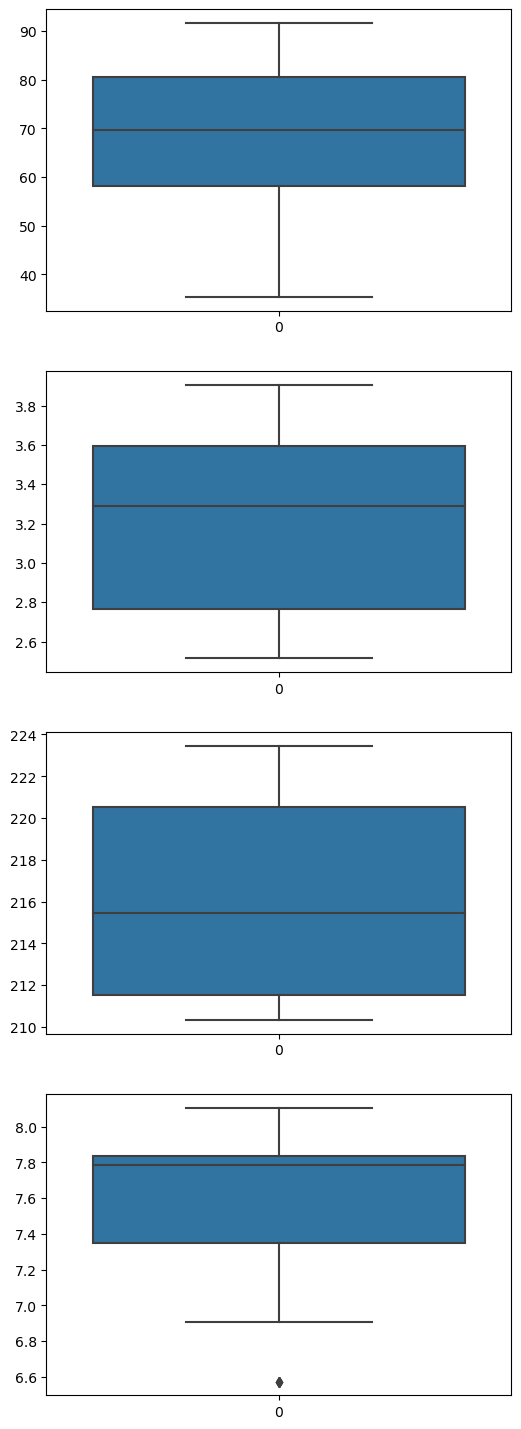

In [53]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = store_1_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(store_1_data[column], ax=axs[i])

In [54]:
# drop the outliers     
data_new = store_1_data[(store_1_data['Unemployment']<10) & (store_1_data['Unemployment']>4.5) & (store_1_data['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,28
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,966
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,973
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,980
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,987


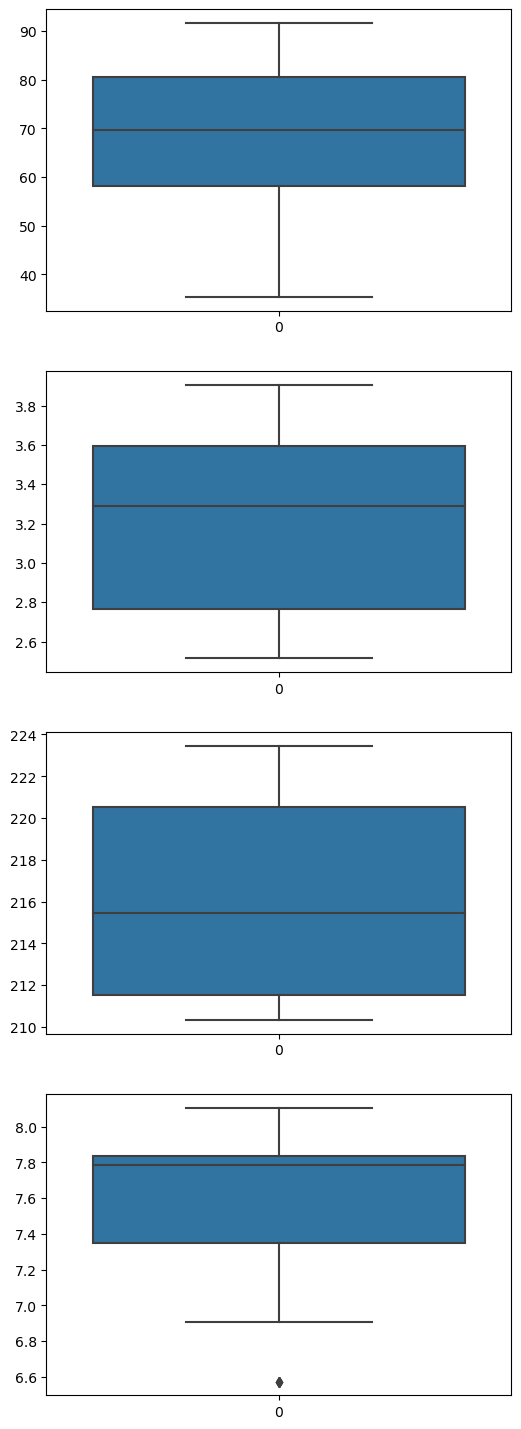

In [55]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [56]:
model =sm.ols(formula="""Weekly_Sales~Store+Holiday_Flag+Temperature+Fuel_Price+CPI+Unemployment+Day""",data =data_new).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.991
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00103
Time:                        15:43:14   Log-Likelihood:                -1900.7
No. Observations:                 143   AIC:                             3815.
Df Residuals:                     136   BIC:                             3836.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.732e+05    1.5e+06     -0.649      0.517   -3.94e+06    1.99e+06
Store        -9.732e+05    1.5e+06     -0.649      0.517   -3.94e+06    1.99e+06
Holiday_Flag  8.807e+04   4.99e+04      1.763      0.080   -1.07e+04    1.87e+05
Temperature  -2182.4335    931.921     -2.342      0.021   -4025.364    -339.503
Fuel_Price    -2.73e+04   4.98e+04     -0.548      0.584   -1.26e+05    7.12e+04
CPI           1.433e+04   1.34e+04      1.066      0.288   -1.22e+04    4.09e+04
Unemployment  8.104e+04   5.91e+04      1.372      0.172   -3.58e+04    1.98e+05
Day             39.8212    200.683      0.198      0.843    -357.042     436.684
==============================================================================
Omnibus:                       86.084   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.258
Skew:                           2.031   Prob(JB):                    9.21e-135
Kurtosis:                      12.332   Cond. No.                     1.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
model =sm.ols(formula="""Weekly_Sales~Holiday_Flag+Temperature""",data =data_new).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.522
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00492
Time:                        15:43:15   Log-Likelihood:                -1906.9
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     140   BIC:                             3829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.692e+06   6.42e+04     26.365      0.000    1.56e+06    1.82e+06
Holiday_Flag  9.541e+04   5.06e+04      1.885      0.062   -4670.530    1.95e+05
Temperature  -2093.9850    909.084     -2.303      0.023   -3891.293    -296.677
==============================================================================
Omnibus:                       76.145   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.516
Skew:                           1.851   Prob(JB):                     1.61e-90
Kurtosis:                      10.463   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Linear Regression:
Accuracy: 6.176571907027917
Mean Absolute Error: 108587.29811376237
Mean Squared Error: 23950342320.389126
Root Mean Squared Error: 154758.9813884452


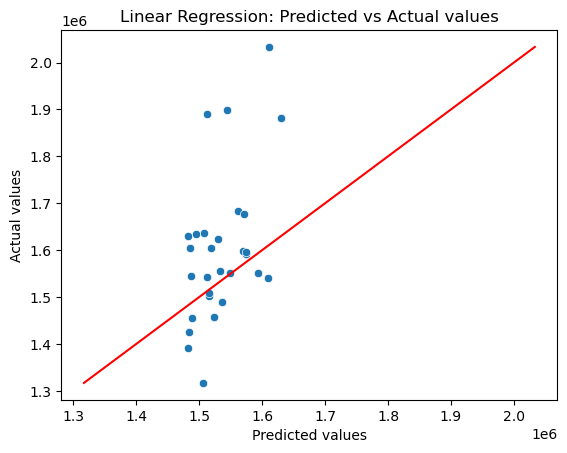

In [84]:
import numpy as np
import seaborn as sns

# Assuming 'data_new' is a predefined DataFrame

# Define features and target variable
X = data_new[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day']]
y = data_new['Weekly_Sales']

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
print('Linear Regression:')
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Model evaluation
print('Accuracy:', reg.score(X_train, y_train) * 100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Scatter plot of predictions vs actual values
sns.scatterplot(x=y_pred, y=y_test)
sns.lineplot(x=y_test, y=y_test, color='red')  # Adding a reference line
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Linear Regression: Predicted vs Actual values')
plt.show()

Random Forest Regressor:
Accuracy: 13.647876242213119
Mean Absolute Error: 109975.52265724906
Mean Squared Error: 20886156337.120064
Root Mean Squared Error: 144520.4357076191


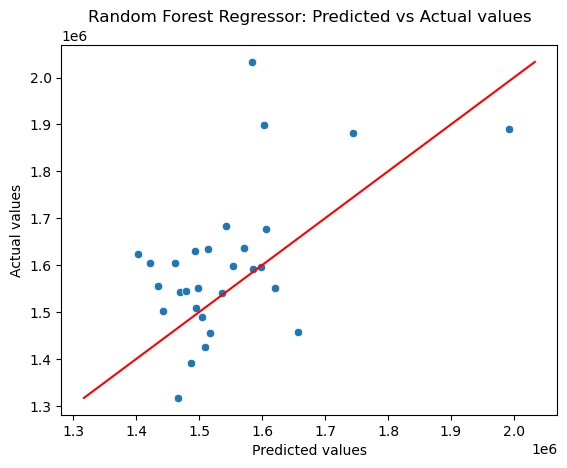

In [85]:
print('Random Forest Regressor:')
rfr = RandomForestRegressor(n_estimators=400, max_depth=15, n_jobs=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Random Forest Regressor model evaluation
print('Accuracy:', rfr.score(X_test, y_test) * 100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

# Scatter plot for Random Forest Regressor
sns.scatterplot(x=y_pred_rfr, y=y_test)
sns.lineplot(x=y_test, y=y_test, color='red')  # Adding a reference line
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest Regressor: Predicted vs Actual values')
plt.show()